In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [106]:
data = pd.read_csv('Case Study - Transaction.csv', delimiter=';')

In [107]:
data.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


Data Cleansing

In [108]:
data.shape

(5020, 8)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [110]:
data.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


In [111]:
data.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [112]:
data.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [113]:
data['Date'] = pd.to_datetime(data['Date'])
data['Qty'] = pd.to_numeric(data['Qty'], errors='coerce')
data = data.dropna(subset=['Qty'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_14124\962927025.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [114]:
data = data.dropna(subset=['Qty'])

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


In [116]:
data_gabung = data.groupby('Date')['Qty'].sum().reset_index()

In [117]:
data_gabung

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


In [118]:
data_gabung.set_index('Date', inplace=True)

In [119]:
data_gabung

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


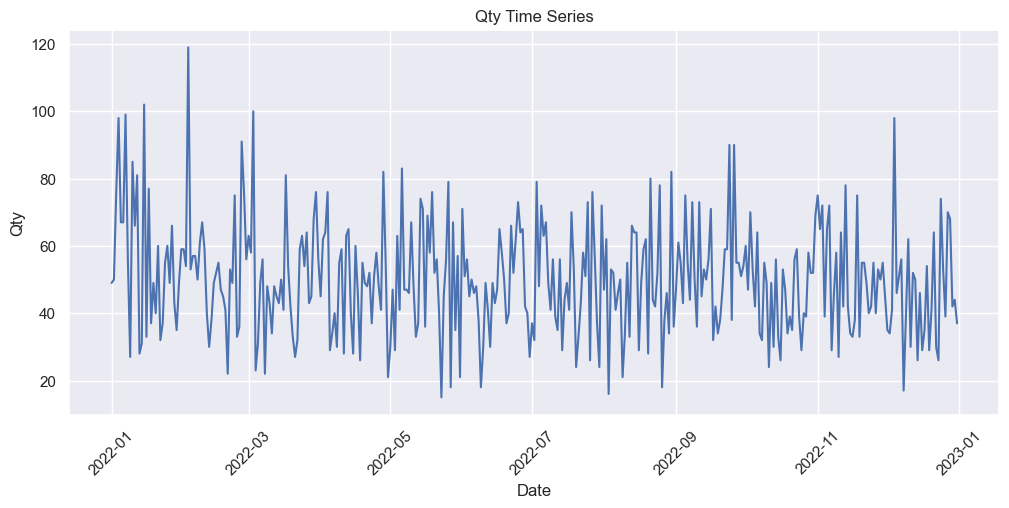

In [120]:
# Plot the time series data
sns.set()
plt.figure(figsize=(12, 5))
plt.ylabel('Qty')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(data_gabung.index, data_gabung['Qty'])
plt.title('Qty Time Series')
plt.show()

In [121]:
train_data = data_gabung[data_gabung.index < "2022-12-01"]
test_data = data_gabung[data_gabung.index >= "2022-12-01"]

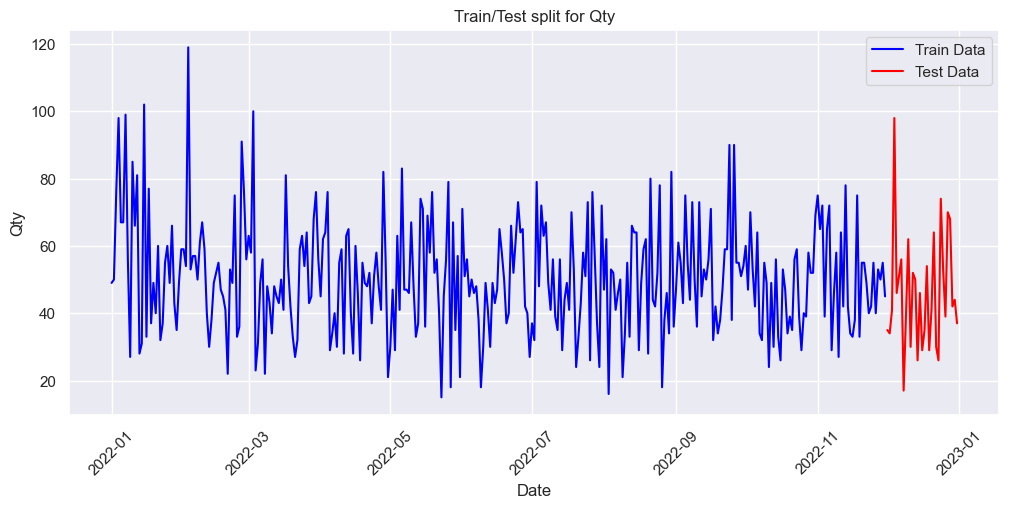

In [122]:
# Plot train and test data
plt.figure(figsize=(12, 5))
plt.plot(train_data, color='blue', label='Train Data')
plt.plot(test_data, color='red', label='Test Data')
plt.ylabel('Qty')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Qty")
plt.legend()
plt.show()

In [123]:
model = ARIMA(train_data, order=(1,1,1))
model_fit = model.fit()

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [124]:
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [125]:
predictions.head()

2022-12-01    49.584164
2022-12-02    49.537172
2022-12-03    49.537653
2022-12-04    49.537648
2022-12-05    49.537648
Freq: D, Name: predicted_mean, dtype: float64

RMSE: 17.26


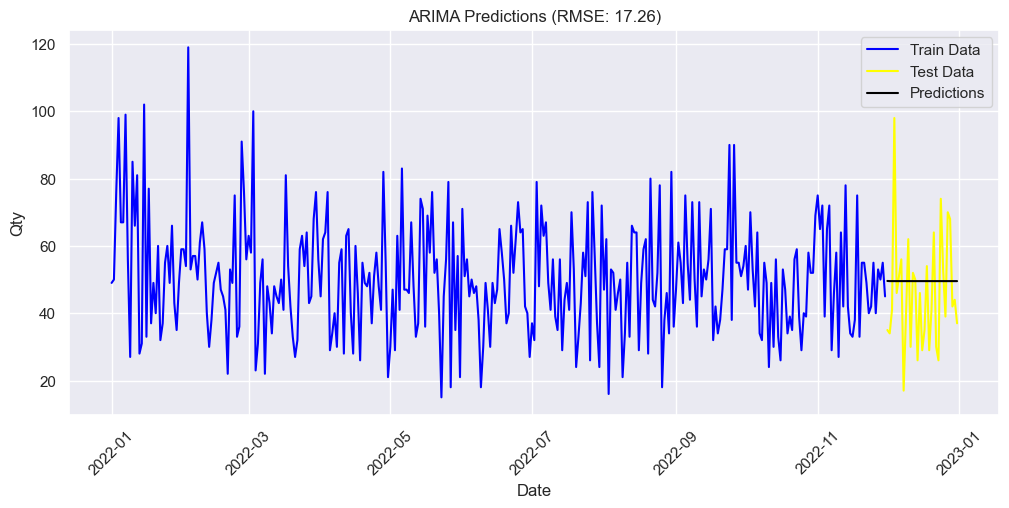

In [126]:
# Calculate RMSE
mse = mean_squared_error(test_data, predictions)
rmse = round(np.sqrt(mse), 2)
print("RMSE:", rmse)

# Visualize Predictions
plt.figure(figsize=(12,5))
plt.plot(train_data, color="blue", label='Train Data')
plt.plot(test_data, color="yellow", label='Test Data')
plt.plot(test_data.index, predictions, color="black", label='Predictions')
plt.ylabel('Qty')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("ARIMA Predictions (RMSE: {})".format(rmse))
plt.legend()
plt.show()

Model ARIMA tidak cocok pada data yang terlalu fluktuatif seperti pada kasus ini. ARIMA bekerja dengan baik pada data yang menunjukkan pola tren yang teratur dan variasi yang stabil. Ketika data memiliki fluktuasi yang sangat tinggi atau ketidakstabilan yang ekstrem, ARIMA mungkin tidak dapat menghasilkan prediksi yang akurat.